In [2]:
import pandas as pd
import re
import nltk
import spacy
import matplotlib.pyplot as plt
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [4]:
#Load the dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print("Dataset loaded. Shape:", df.shape)
print(df.head())


Dataset loaded. Shape: (5572, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
#Basic text cleaning
def clean_text(text):
    text = text.lower()                           # lowercase
    text = re.sub(r'[^\w\s]', '', text)           # remove punctuation
    text = re.sub(r'\d+', '', text)               # remove digits
    text = re.sub(r'\s+', ' ', text).strip()      # remove extra spaces
    return text


In [6]:
  df['clean_message'] = df['message'].apply(clean_text)

print("\n🔹 Example before and after cleaning:")
print("Original:", df['message'][0])
print("Cleaned :", df['clean_message'][0])



🔹 Example before and after cleaning:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Cleaned : go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat


In [7]:
#Tokenitazion

sample_text = df['clean_message'][0]

In [8]:
sent_tokens = sent_tokenize(sample_text)
word_tokens = word_tokenize(sample_text)

print("Sentence tokens:", sent_tokens)
print("Word tokens:", word_tokens)

Sentence tokens: ['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat']
Word tokens: ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']


In [9]:
#Stopword removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in word_tokens if w not in stop_words]

print("Word count before stopword removal:", len(word_tokens))
print("Word count after stopword removal :", len(filtered_tokens))
print("Words after removal:", filtered_tokens)

Word count before stopword removal: 20
Word count after stopword removal : 16
Words after removal: ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']


In [10]:
#Stemming and lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

#Picking 10 words from the first message
words_to_test = word_tokens[:10]

print("Stemming vs Lemmatization (comparison):")
for w in words_to_test:
    print(f"{w} -> Stem: {stemmer.stem(w)}, Lemma: {lemmatizer.lemmatize(w)}")

print("Note: Lemmatization keeps words more readable, while stemming can cut them too much.")

Stemming vs Lemmatization (comparison):
go -> Stem: go, Lemma: go
until -> Stem: until, Lemma: until
jurong -> Stem: jurong, Lemma: jurong
point -> Stem: point, Lemma: point
crazy -> Stem: crazi, Lemma: crazy
available -> Stem: avail, Lemma: available
only -> Stem: onli, Lemma: only
in -> Stem: in, Lemma: in
bugis -> Stem: bugi, Lemma: bugis
n -> Stem: n, Lemma: n
Note: Lemmatization keeps words more readable, while stemming can cut them too much.


In [11]:
#POS Tagging

pos_tags = nltk.pos_tag(word_tokens)
print("POS tagging example:", pos_tags)

POS tagging example: [('go', 'VB'), ('until', 'IN'), ('jurong', 'JJ'), ('point', 'NN'), ('crazy', 'NN'), ('available', 'JJ'), ('only', 'RB'), ('in', 'IN'), ('bugis', 'NN'), ('n', 'RB'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN'), ('e', 'VBP'), ('buffet', 'JJ'), ('cine', 'NN'), ('there', 'EX'), ('got', 'VBD'), ('amore', 'RB'), ('wat', 'JJ')]


In [12]:
pos_counts = Counter(tag for word, tag in pos_tags)

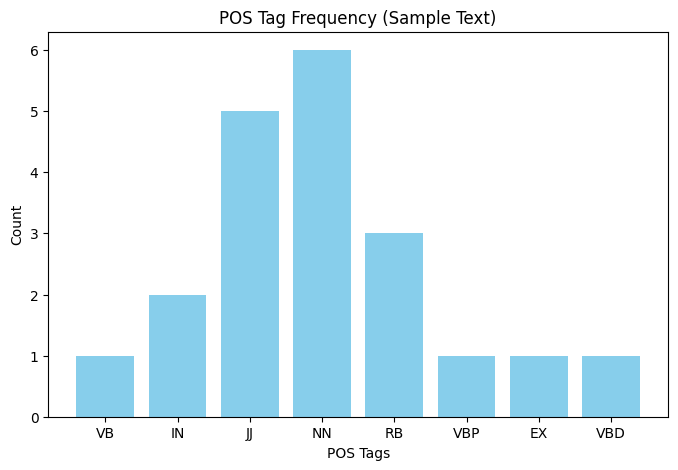

In [13]:
plt.figure(figsize=(8,5))
plt.bar(pos_counts.keys(), pos_counts.values(), color='skyblue')
plt.title("POS Tag Frequency (Sample Text)")
plt.xlabel("POS Tags")
plt.ylabel("Count")
plt.show()


In [18]:
# Named Entity Recognition (NER)
doc = nlp(sample_text)
print("\nNamed Entities found:")
for ent in doc.ents:
    print(ent.text, "->", ent.label_)


Named Entities found:


In [19]:
#Visualize entities with displacy
from spacy import displacy
displacy.render(doc, style="ent")

/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)
